In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import string
import random
seed = 42
np.random.seed(seed)

# Goal:
Generate two graphs with different structures, but containing the same nodes.

We start with two graphs with the same number of nodes, but with a different structure.

/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


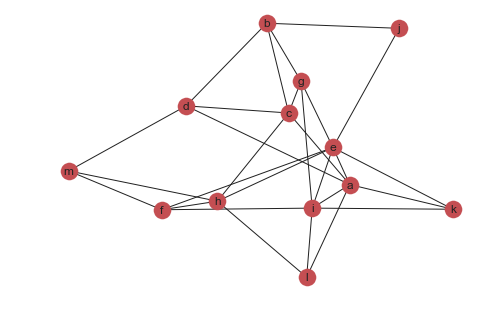

In [41]:
bx = nx.binomial_graph(n=13, p=0.3, seed=seed)

letters = string.ascii_lowercase
rename_map = {k:string.ascii_lowercase[k] for k in range(len(bx))}
bx = nx.relabel_nodes(bx, rename_map)
# nx.watts_strogatz_graph(10)
nx.draw(bx, with_labels=True)


13


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


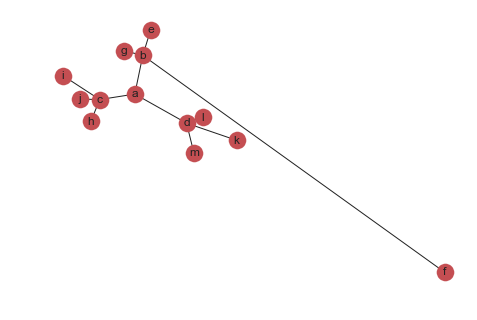

In [42]:
bt = nx.balanced_tree(3,2)
print(len(bt))
# Add random weights on edges
for (u, d) in bt.nodes(data=True):
    d['alpha'] = random.randint(1,2)
    d['beta'] = random.randint(1,2)
for (u,v,w) in bt.edges(data=True):
    w['weight'] = random.randint(0,10)

# Change the name of the labels of the graph
letters = string.ascii_lowercase
rename_map = {k:string.ascii_lowercase[k] for k in range(len(bt))}
bt = nx.relabel_nodes(bt, rename_map)
nx.draw(bt, with_labels=True)
# This works

[('a', 'c'), ('a', 'd'), ('a', 'e'), ('a', 'i'), ('a', 'k'), ('a', 'l'), ('b', 'c'), ('b', 'd'), ('b', 'g'), ('b', 'j'), ('c', 'd'), ('c', 'g'), ('c', 'h'), ('d', 'm'), ('e', 'f'), ('e', 'g'), ('e', 'h'), ('e', 'i'), ('e', 'j'), ('e', 'k'), ('f', 'h'), ('f', 'i'), ('f', 'm'), ('g', 'i'), ('h', 'l'), ('h', 'm'), ('i', 'k'), ('i', 'l')]


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


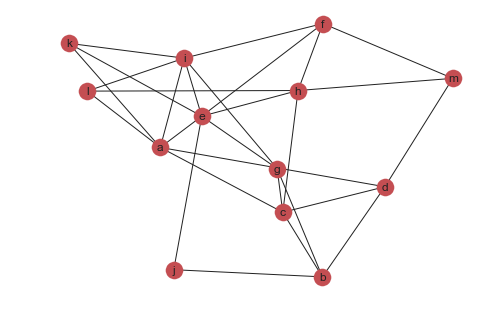

In [44]:
bt_edges = [(u,v) for u,v in bt.edges()]

bx_edges = [(u,v) for u,v in bx.edges()]
bx_data  = 23
print(bx_edges)
ng = bt.copy()

ng.remove_edges_from(bt_edges)
ng.add_edges_from(bx_edges)
nx.draw(ng, with_labels=True)

In [46]:
[(u,v,d) for (u,v,d) in bt.edges(data=True)]

[('a', 'b', {'weight': 4}),
 ('a', 'c', {'weight': 6}),
 ('a', 'd', {'weight': 2}),
 ('b', 'e', {'weight': 7}),
 ('b', 'f', {'weight': 0}),
 ('b', 'g', {'weight': 4}),
 ('c', 'h', {'weight': 8}),
 ('c', 'i', {'weight': 2}),
 ('c', 'j', {'weight': 8}),
 ('d', 'k', {'weight': 1}),
 ('d', 'l', {'weight': 10}),
 ('d', 'm', {'weight': 4})]

In [60]:
node_data = {u:d for u,d in bt.nodes(data=True)}
print(node_data)

{'a': {'alpha': 2, 'beta': 1}, 'b': {'alpha': 1, 'beta': 2}, 'c': {'alpha': 2, 'beta': 2}, 'd': {'alpha': 2, 'beta': 1}, 'e': {'alpha': 1, 'beta': 2}, 'f': {'alpha': 1, 'beta': 1}, 'g': {'alpha': 1, 'beta': 1}, 'h': {'alpha': 1, 'beta': 2}, 'i': {'alpha': 1, 'beta': 2}, 'j': {'alpha': 2, 'beta': 2}, 'k': {'alpha': 2, 'beta': 1}, 'l': {'alpha': 1, 'beta': 2}, 'm': {'alpha': 2, 'beta': 1}}


/Users/ripod1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


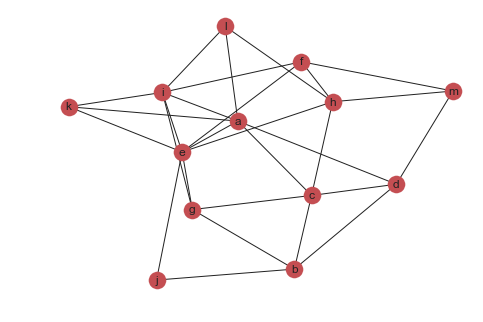

In [59]:
G_copy = nx.Graph()
G_copy.add_nodes_from(bt.nodes(data=True))
G_copy.add_edges_from(bx.edges(data=True))
nx.draw(G_copy, with_labels=True)

The previous line is likely the most efficient mechanism of copying both the nodes, their attributes and their corresponding data.